my comment

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [18]:
size = [10000000]
files = ["alex", "gregor", "5950x-py3-12-gregor", "pi4-jp", "jp-laptop-jp"]
no_pi_files = ["alex", "gregor", "5950x-py3-12-gregor", "jp-laptop-jp"]


In [19]:
def generate_average(df, tag=None, size=None, name=None):
    _df = df.loc[(df['name'] == name) & (df['tag'] == tag) &  (df['size'] == size) ]
    avg = _df.groupby(['processors', 'name', 'size', 'tag']).mean()
    avg['tag'] = tag
    avg['name'] = name
    return avg

In [20]:
def plot_benchmark_by_size(df, size=None, tag=None, files=None, x="processors", y="time"):
    names = "-".join(files)
    sns.lineplot(data=df, x=x, y=y, hue="name");
    t = tag.title()
    label = f"{t}, Size={size}".replace("_", " ")
    plt.title(f"{label}")
    if "time" in y: y = f"{y}/s"
    if "time" in x: x = f"{x}/s"
    plt.xlabel(x.capitalize())
    plt.ylabel(y.capitalize())
    plt.savefig(f"images/by-size-{size}-{tag}-{names}.png")
    plt.savefig(f"images/by-size-{size}-{tag}-{names}.pdf")

In [21]:
def get_data(content, tag="multiprocessing_mergesort", size=None, log=None):
    """
    TBD

    :param content: data output from running mergesort
    :type content: string
    :return: none
    :rtype: none
    """
    found = []
    lines = [line for line in content if "# csv" in line]

    for line in lines[1:]:
        entries = line.split(",")
        entry = [entries[a] for a in [1, 3, 9, 8]]
        time = entry[1]
        name = f"{entry[2]}-{entry[3]}"

        processes, size, count = entry[0].split(tag)[1].split("_")[1:]

        entry = [
            int(processes),
            # int(count),
            float(time),
            int(size),
            name,
            tag
        ]
        found.append(entry)
    return found

In [22]:
def read_log(log, size=None, tag="multiprocessing_mergesort"):
    if ".log" not in log:
        log = f"log/{log}-{size}.log"
    f = open(log, "r")
    content = f.read().splitlines()
    try:
        data = get_data(content, tag=tag, size=size, log=log)
    except:
        print("ERROR READING", log)
    return data


In [23]:
def read_logs(files=None, size =[100], tag=["multiprocessing_mergesort"]):
    data = []
    for file in files:
        for s in size:
            content = read_log(file, size=s, tag="multiprocessing_mergesort")
            data = data + content
    #for i in range(0,len(data)):
    #    data[i] = [i] + data[i]
    df = pd.DataFrame(data)
    df.columns = ['processors', 'time', 'size', 'name', 'tag']
    return df

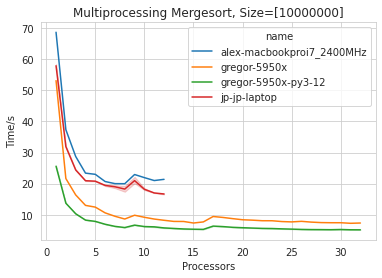

In [24]:
df = read_logs(files=no_pi_files, size=size)
plot_benchmark_by_size(df, size, "multiprocessing_mergesort", files)
plt.show()

In [25]:
df = read_logs(files=files, size=size)
df

,processors,time,size,name,tag
0,12,21.369,10000000,alex-macbookproi7_2400MHz,multiprocessing_mergesort
1,11,20.981,10000000,alex-macbookproi7_2400MHz,multiprocessing_mergesort
2,10,21.921,10000000,alex-macbookproi7_2400MHz,multiprocessing_mergesort
3,9,22.923,10000000,alex-macbookproi7_2400MHz,multiprocessing_mergesort
4,8,19.963,10000000,alex-macbookproi7_2400MHz,multiprocessing_mergesort
...,...,...,...,...,...
519,1,58.239,10000000,jp-jp-laptop,multiprocessing_mergesort
520,1,57.243,10000000,jp-jp-laptop,multiprocessing_mergesort
521,1,58.195,10000000,jp-jp-laptop,multiprocessing_mergesort
522,1,59.450,10000000,jp-jp-laptop,multiprocessing_mergesort


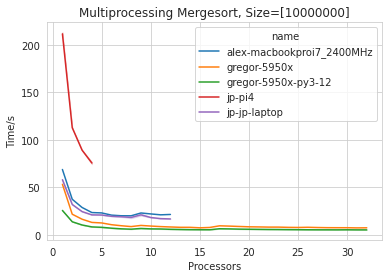

In [26]:
    plot_benchmark_by_size(df, size, "multiprocessing_mergesort", files)
    plt.show()

In [ ]:
# calculate the avarage of all data with the same repeat
df_average = ...

In [ ]:
# calculate the speedup
df_speedup = ...

In [ ]:
# calculate the efficiency
df_efficiency =

In [ ]:
# produce the plots
...

In [9]:
def calculate_speedup(size):
    tag = "multiprocessing_mergesort"
    data = []

    for file in files:
        try:
            _data = read_log(file, size=size)
            print(f"Read: {file}")
            data = data + _data
        except:
            pass

    # print data
    print(data)

    df = pd.DataFrame(data = data, 
                      columns = ["processors", "time", "size", "name", "tag"])
    # df["speedup"] = df["time"].max()  / df["time"] 
    print(df["time"])

    plot_benchmark_by_size(df, size, tag, files)
    plt.show()
 
    # calculate average
    avg = pd.DataFrame()
    for name in files:
        _df = generate_average(df, tag="multiprocessing_mergesort", name=name, size=size)
        avg = pd.concat([avg, _df])
    print(avg)

    # calculate speedup
    speedup = pd.DataFrame(avg)
    # speedup["p"] = speedup.index.get_level_values(0).astype(float)

    frames = []
    for name in files:
        # select all times with given user name
        df = speedup[speedup['name'] == name]
        time_for_one_processor = df.query('processors == 1').iat[0, 0]
        # calculate speedup by dividing time by time taken using one processor 
        df['speedup'] = df["time"].rdiv(time_for_one_processor)
        frames.append(df)

    result = pd.concat(frames)
    print(result)

    plot_benchmark_by_size(result, size=size, tag=tag, files=files, x="processors", y="speedup")
    plt.show()
    

[]
Series([], Name: time, dtype: object)


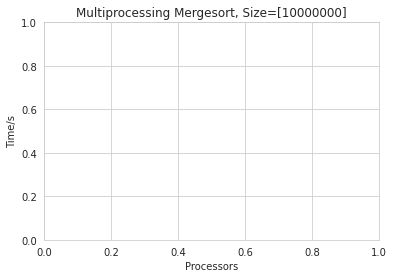

ValueError: ('Lengths must match to compare', (0,), (1,))

In [10]:
calculate_speedup(size)


In [ ]:
def calculate_efficiency(size):
    tag = "multiprocessing_mergesort"
    data = []

    for file in files:
        try:
            _data = read_log(file, size=size)
            data = data + _data
        except:
            pass
    # print data
    print(data)

    df = pd.DataFrame(data = data, 
                      columns = ["processors", "time", "size", "name", "tag"])
    # df["speedup"] = df["time"].max()  / df["time"] 
    print(df["time"])

    plot_benchmark_by_size(df, size, tag, files)
    plt.show()

    # calculate average
    avg = pd.DataFrame()
    for name in files:
        _df = generate_average(df, tag="multiprocessing_mergesort", name=name, size=size)
        avg = pd.concat([avg, _df])
    # print(avg)

    # calculate speedup
    speedup = pd.DataFrame(avg)
    # speedup["p"] = speedup.index.get_level_values(0).astype(float)

    speedup_frames = []
    for name in files:
        # select all times with given user name
        df = speedup[speedup['name'] == name]
        time_for_one_processor = df.query('processors == 1').iat[0, 0]
        # calculate speedup by dividing time by time taken using one processor 
        df['speedup'] = df["time"].rdiv(time_for_one_processor)
        speedup_frames.append(df)

    result = pd.concat(speedup_frames)
    result['p'] = speedup.index.get_level_values(0).astype(float)
    result['efficiency'] = result['speedup'] / result['p']
    # print(result['efficiency'])

    plot_benchmark_by_size(result, size=size, tag=tag, files=files, x="processors", y="efficiency")
    plt.show()
    

In [ ]:
size = 10000000
calculate_efficiency(size)